In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

## Загружаем данные о полетах.

In [9]:
df = pd.read_csv('/Users/Liza/Desktop/flight_delays.csv')
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


##  Доля всех задержек ко всем вылетам.

Количество задержанных рейсов: 19.0 %


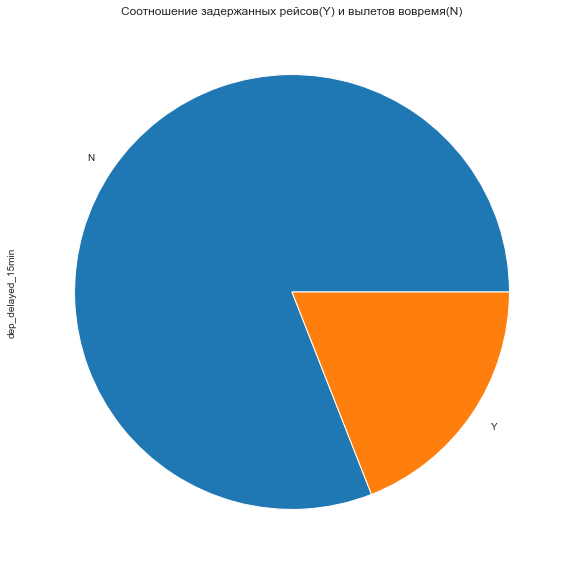

In [34]:
print('Количество задержанных рейсов:', round(df['dep_delayed_15min'].value_counts(normalize=True)[1], 2)*100,'%')
df['dep_delayed_15min'].value_counts(normalize=True).plot(kind='pie', figsize=(10,10))
plt.title('Соотношение задержанных рейсов(Y) и вылетов вовремя(N)');

## Зависимость количества задержек от длины пути, который предстоит пролететь самолёту.

In [22]:
df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()

,Distance
1241,1
699,1
555,1
523,1
710,1
...,...
761,87
528,88
612,89
403,90


In [27]:
df1 = df[(df['dep_delayed_15min'] == 'Y')]['Distance'].value_counts(ascending=True).to_frame()
new_df = pd.DataFrame({'Distance' : df1.index, 'Number' : df1['Distance'].values})

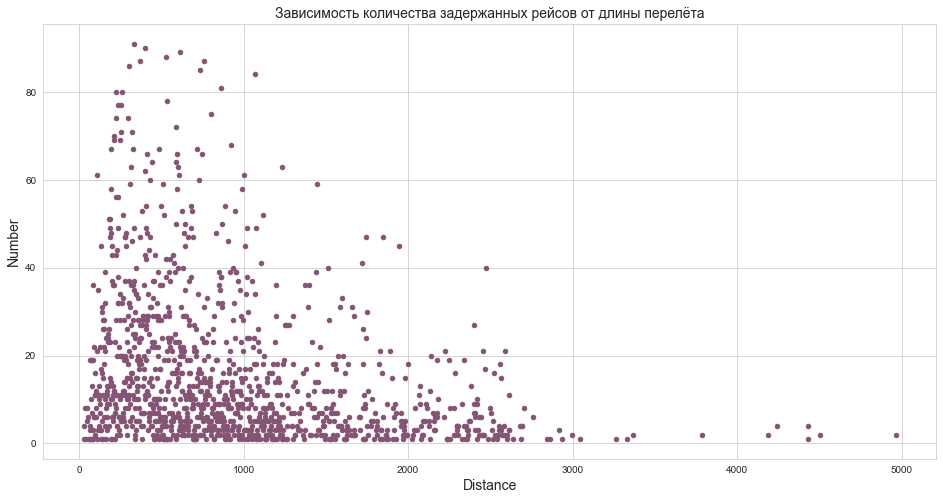

In [31]:
new_df.plot.scatter(x = 'Distance', y = 'Number', color = (0.52,0.33,0.46), figsize = (16, 8));
plt.title('Зависимость количества задержанных рейсов от длины перелёта', fontsize = 14);
plt.xlabel('Distance', fontsize = 14)
plt.ylabel('Number', fontsize = 14)
plt.show()

## Топ 5 направлений, для которых чаще всего происходят задержки рейсов.

In [35]:
df2 = df[(df['dep_delayed_15min'] == 'Y')][['Origin', 'Dest']].value_counts(ascending=False).to_frame()
df2.head(10)

,,0
Origin,Dest,
ATL,LGA,50
ORD,LGA,45
LAS,LAX,40
ATL,EWR,39
LAX,LAS,37
DFW,ORD,37
LGA,ORD,36
PHX,LAS,34
ORD,SFO,32


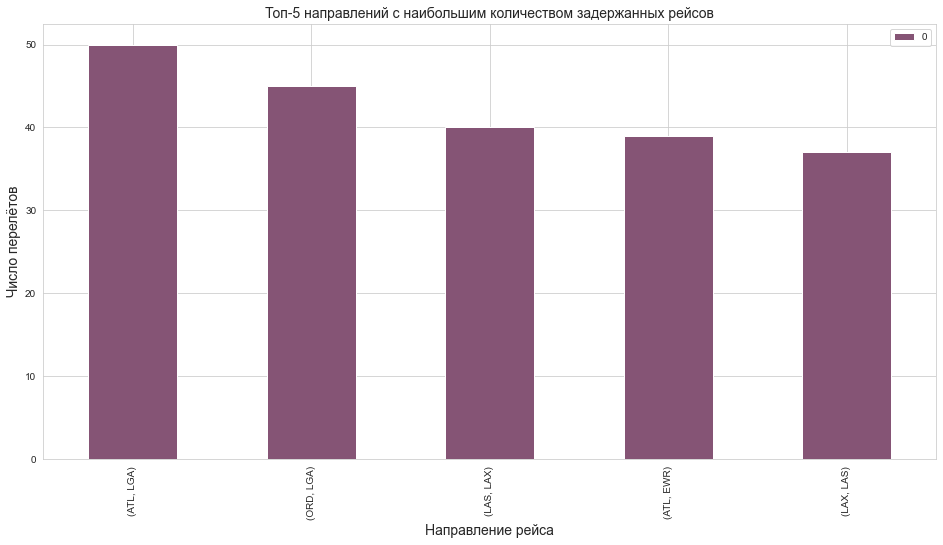

In [37]:
df2.head(5).plot.bar(figsize = (16, 8), color = (0.52,0.33,0.46), label = 'количество перелётов')
plt.title('Топ-5 направлений с наибольшим количеством задержанных рейсов', fontsize = 14);
plt.xlabel('Направление рейса', fontsize = 14)
plt.ylabel('Число перелётов', fontsize = 14)
plt.show()

## В какие времена года чаще всего задерживают рейсы.

In [45]:
df3 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'Month' : {'c-1':'January', 'c-2':'February', 'c-3':'March', 'c-4':'April', 'c-5':'May', 'c-6':'June',
                'c-7':'July', 'c-8':'August', 'c-9':'September', 'c-10':'October','c-11':'November', 'c-12':'December'}})

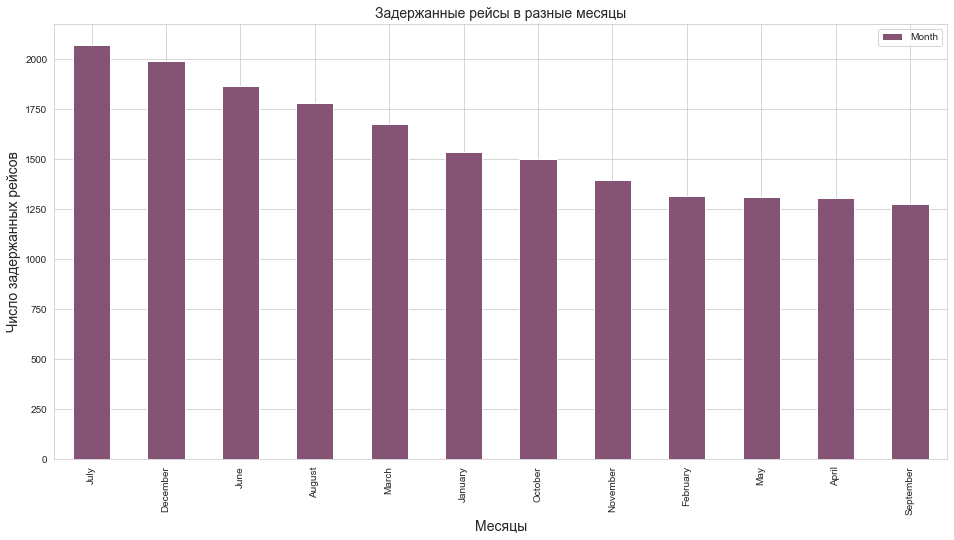

In [54]:
df3_new = df3['Month'].value_counts(ascending=False).to_frame()
df3_new.plot.bar(figsize = (16, 8), color = (0.52,0.33,0.46))
plt.title('Задержанные рейсы в разные месяцы', fontsize = 14);
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Число задержанных рейсов', fontsize = 14)
plt.show()

## Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы.

In [56]:
No_delayed = df[(df['dep_delayed_15min'] == 'N')]['UniqueCarrier'].value_counts(ascending=False)
delayed = df[(df['dep_delayed_15min'] == 'Y')]['UniqueCarrier'].value_counts(ascending=False)
ratio = delayed/No_delayed
df4 = ratio.sort_values(ascending=True).iloc[0:10]

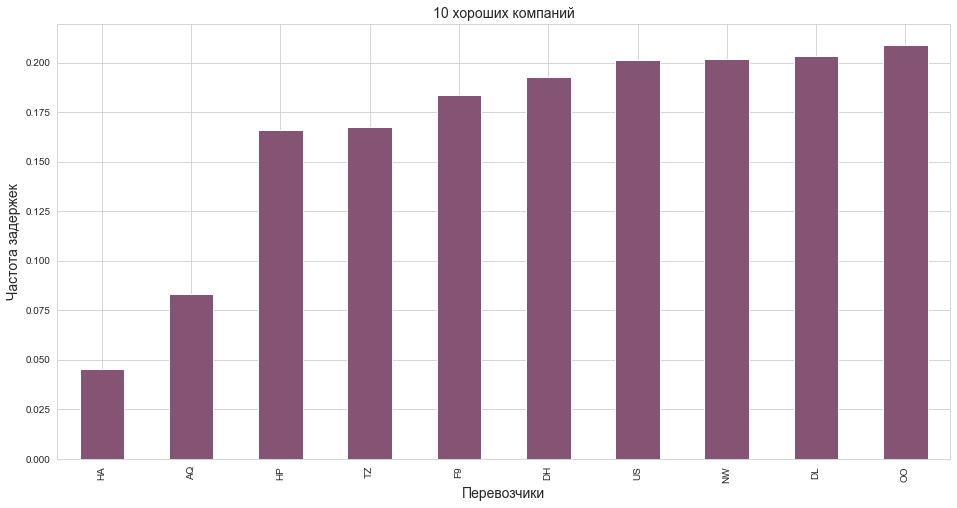

In [64]:
df4.plot.bar(figsize = (16, 8), color = (0.52,0.33,0.46))
plt.title('10 хороших компаний', fontsize = 14);
plt.xlabel('Перевозчики', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

## Топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки.

Рассмотрим крупные аэропорты из которых полетов было много (допустим больше 1000).

In [65]:
No_delayed_A_1000 = No_delayed_A[No_delayed_A > 1000]
delayed_A_1000 = delayed_A
ratio_A_1000 = delayed_A_1000/No_delayed_A_1000
df5_1000 = ratio_A_1000.sort_values(ascending=False).iloc[0:10]

In [66]:
df5_1000

ATL    0.347967
ORD    0.346792
MDW    0.335288
EWR    0.324487
PHL    0.315704
JFK    0.285223
LAS    0.277580
DTW    0.274282
DFW    0.267815
SEA    0.267442
Name: Origin, dtype: float64

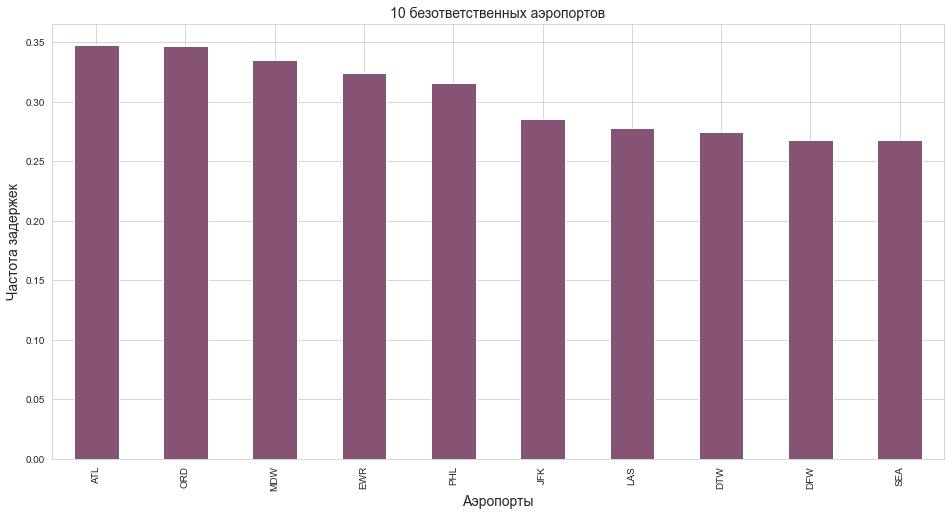

In [68]:
df5_1000.plot.bar(figsize = (16, 8), color = (0.52,0.33,0.46))
plt.title('10 безответственных аэропортов', fontsize = 14);
plt.xlabel('Аэропорты', fontsize = 14)
plt.ylabel('Частота задержек', fontsize = 14)
plt.show()

## Необычная зависимость количества задержек от имеющихся данных. В какой день недели чаще всего задерживают рейсы.

In [69]:
df6 = df[(df['dep_delayed_15min'] == 'Y')].replace(
    {'DayOfWeek' : {'c-1':'Monday', 'c-2':'Tuesday', 'c-3':'Wednesday', 'c-4':'Thursday', 'c-5':'Friday', 'c-6':'Saturday', 'c-7':'Sunday'}})

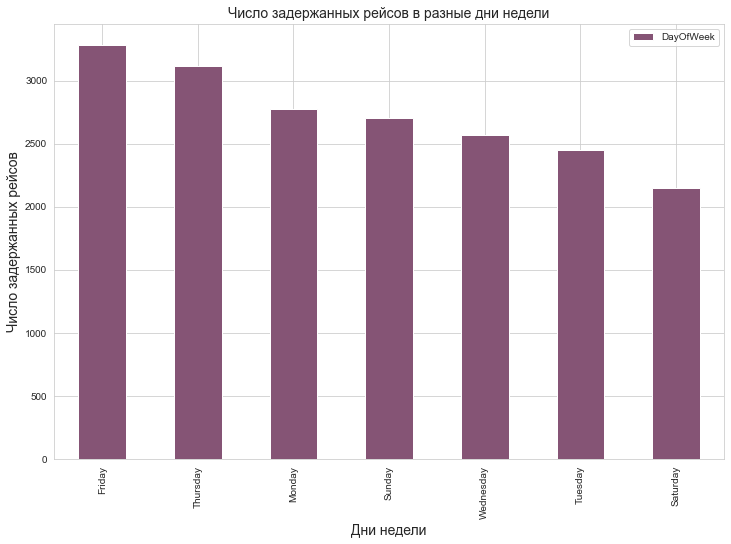

In [71]:
df6_new = df6['DayOfWeek'].value_counts(ascending=False).to_frame()
df6_new.plot.bar(figsize = (12, 8), color = (0.52,0.33,0.46))
plt.title('Число задержанных рейсов в разные дни недели', fontsize = 14);
plt.xlabel('Дни недели', fontsize = 14)
plt.ylabel('Число задержанных рейсов', fontsize = 14)
plt.show()